# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 4 main questions + 1 bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import SymbolicAggregateApproximation #pip install pyts

## 1. Familiarization and discretization task – 1 A4 (5 Points)

In [68]:
data = pd.read_csv("dataset_lab3/dataset_10/capture20110818.binetflow")

In [69]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [70]:
infected_data = data[data["SrcAddr"] == "147.32.84.165"]
non_infected = data[data["SrcAddr"] == "147.32.86.20"]

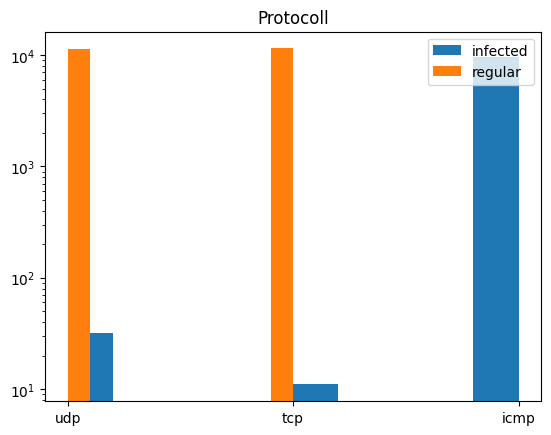

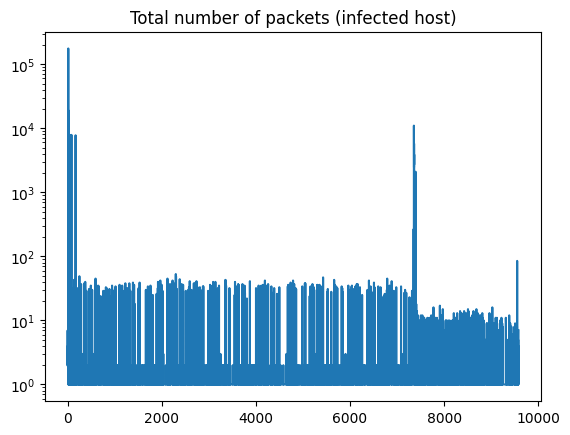

Text(0.5, 1.0, 'Total number of packets (regular)')

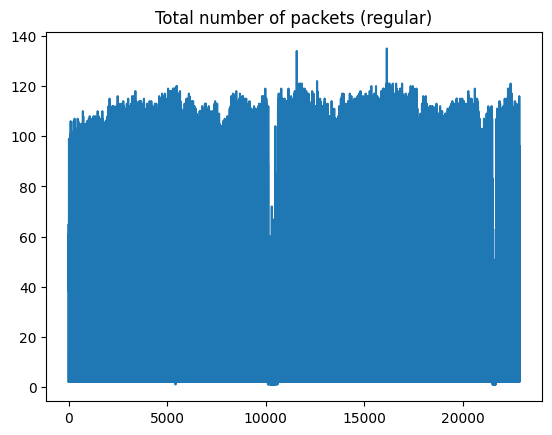

In [87]:
protocoll = infected_data['Proto']
total_packets = infected_data['TotPkts']
protocoll_normal = non_infected['Proto']
total_packets_normal = non_infected['TotPkts']

plt.hist(protocoll, label='infected', log=True)
plt.hist(protocoll_normal, label='regular', log=True)
plt.legend()
plt.title("Protocoll")
plt.show()

plt.semilogy(range(len(total_packets)), total_packets, label='infected')
plt.title("Total number of packets (infected host)")

plt.show()
plt.plot(range(len(total_packets_normal)), total_packets_normal, label='regular')
plt.title("Total number of packets (regular)")


In [124]:
def descritize_data(feature_data, num_bins=10, type="bins", percentiles=None):
    if type == "bins":
        bin_boundaries = np.linspace(np.min(feature_data), np.max(feature_data), num_bins)
        bin_indices = np.digitize(feature_data, bin_boundaries)
        return bin_indices
    elif type == "percentile":
        sample = feature_data.sample(frac=0.1, random_state=42)
        percentile_values = np.percentile(np.unique(sorted(total_packets)), percentiles)
        discretized_array = np.digitize(feature_data, percentile_values)
        return discretized_array
    elif type == "SAX":
        sax = SymbolicAggregateApproximation(n_bins=num_bins, strategy='normal')
        saxed_data = sax.transform(feature_data)
        return saxed_data

[  1   2   3   4   5   7   9  11 100]


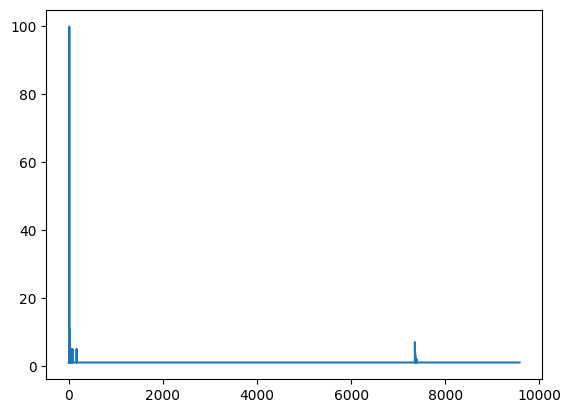

In [108]:
# descrete_duration = descritize_data(protocoll, 20)
# plt.plot(range(len(descrete_duration)), descrete_duration)
# print(np.unique(descrete_duration))
# plt.show()

descrete_packets = descritize_data(total_packets, 100)
plt.plot(range(len(descrete_packets)), descrete_packets)
print(np.unique(descrete_packets))

[1 2 3]


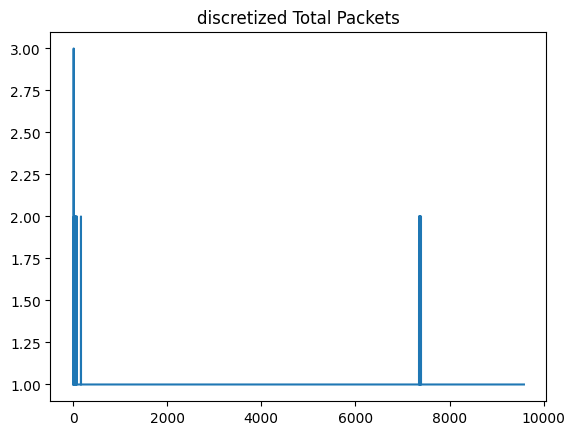

array([    1. ,     1.7,     2.4,     3.1,     3.8,     4.5,     5.2,
           5.9,     6.6,     7.3,     8. ,     8.7,     9.4,    10.1,
          10.8,    11.5,    12.2,    12.9,    13.6,    14.3,    15. ,
          15.7,    16.4,    17.1,    17.8,    19. ,    20.2,    20.9,
          21.6,    22.3,    23. ,    23.7,    24.4,    25.1,    25.8,
          26.5,    27.2,    27.9,    28.6,    29.3,    30. ,    30.7,
          31.4,    32.1,    32.8,    33.5,    34.2,    34.9,    35.6,
          36.3,    37. ,    37.7,    38.4,    39.1,    39.8,    40.5,
          41.2,    41.9,    42.6,    43.3,    44. ,    44.7,    45.8,
          47.2,    48.6,    51. ,    59.4,    81.8,   120.4,   150. ,
         164. ,   236.1,   964.2,  2013.1,  2034.8,  2055.5,  2071. ,
        2074.5,  2088.8,  2206.6,  2460. ,  2481. ,  2574. ,  2819.2,
        3653.6,  4826.5,  5992.4,  6802.3,  7381.2,  7716.1,  7777. ,
        7784. ,  7817.4,  7865.8,  7885.4,  9445.5, 11846.8, 14810.6,
       17471.4, 6615

In [134]:
# descrete_duration = descritize_data(duration, type="percentile", percentiles=range(0, 100, 5))
# plt.plot(range(len(descrete_duration)), descrete_duration)
# plt.title("discretized Duration")
# print(np.unique(descrete_duration))
# plt.show()
descrete_packets = descritize_data(total_packets, type="percentile", percentiles=[0, 70, 99])
plt.plot(range(len(descrete_packets)), descrete_packets)
plt.title("discretized Total Packets")
print(np.unique(descrete_packets))
plt.show()

# descrete_packets = descritize_data(np.array(total_packets).reshape(-1, 1) , num_bins=10, type="SAX")
# descrete_packets = np.array(descrete_packets)
# plt.plot(range(len(descrete_packets)), descrete_packets)
# plt.title("discretized Total Packets")
# print(np.unique(descrete_packets))
# plt.show()

# np.set_printoptions(suppress=True)
# np.percentile(np.unique(sorted(total_packets)), range(0, 100, 1))

In [75]:
# potential_hosts = data["SrcAddr"][data["Label"].str.contains("Botnet")]
# for add in potential_hosts:
#     infected_data = data[data["SrcAddr"] == add]
#     duration = infected_data['Dur']
#     total_packets = infected_data['TotPkts']
#     plt.plot(range(len(duration)), duration)
#     plt.title("Duration")
#     plt.show()
#     plt.plot(range(len(total_packets)), total_packets)
#     plt.title("Total number of packets")
#     plt.show()
#     input()

In [76]:
# combined_features_mean = np.mean([descrete_duration, descrete_packets], axis=0)
# combined_features_add = descrete_duration + descrete_packets
# plt.plot(range(len(combined_features_mean)), combined_features_mean)
# plt.title("Combined descretized features (mean)")
# plt.show()
# plt.plot(range(len(combined_features_add)), combined_features_add)
# plt.title("Combined descretized features (add)")
# plt.show()

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

### 1b. Discretize selected features

### 1c. Answers and explanation

## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

### 2a. COUNT-MIN sketch


### 2b. Analysis and answers to the questions

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

### 3b. Analysis and answers to the questions

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.